In [1]:
# ML & Evaluation
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,
    roc_curve, auc, ConfusionMatrixDisplay, RocCurveDisplay
)

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

print("📦 Libraries loaded!")


📦 Libraries loaded!


In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("somesh24/spambase")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/spambase


In [4]:
import pandas as pd
import os

# Define the dataset directory
path = "/kaggle/input/spambase"

# Automatically find the file (usually .csv or .data)
data_file = None
for file in os.listdir(path):
    if file.endswith(".csv") or file.endswith(".data"):
        data_file = os.path.join(path, file)
        break

# Sanity check
if data_file is None:
    raise FileNotFoundError("No CSV or DATA file found in the specified directory.")

# Load the dataset
df = pd.read_csv(data_file, header=None)

# Assign column names from UCI documentation
# Define all 58 columns
column_names = [
    # 48 word frequency features
    'word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d', 'word_freq_our',
    'word_freq_over', 'word_freq_remove', 'word_freq_internet', 'word_freq_order', 'word_freq_mail',
    'word_freq_receive', 'word_freq_will', 'word_freq_people', 'word_freq_report', 'word_freq_addresses',
    'word_freq_free', 'word_freq_business', 'word_freq_email', 'word_freq_you', 'word_freq_credit',
    'word_freq_your', 'word_freq_font', 'word_freq_000', 'word_freq_money', 'word_freq_hp',
    'word_freq_hpl', 'word_freq_george', 'word_freq_650', 'word_freq_lab', 'word_freq_labs',
    'word_freq_telnet', 'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
    'word_freq_technology', 'word_freq_1999', 'word_freq_parts', 'word_freq_pm', 'word_freq_direct',
    'word_freq_cs', 'word_freq_meeting', 'word_freq_original', 'word_freq_project', 'word_freq_re',
    'word_freq_edu', 'word_freq_table', 'word_freq_conference',

    # 6 char frequency features
    'char_freq_;', 'char_freq_(', 'char_freq_[', 'char_freq_!', 'char_freq_$', 'char_freq_#',

    # 3 capital run length features
    'capital_run_length_average', 'capital_run_length_longest', 'capital_run_length_total',

    # Target column
    'spam'
]
df.columns = column_names

# Remove the header row that was loaded as data
df = df.iloc[1:].reset_index(drop=True)

# Verify
print("✅ Dataset loaded from:", data_file)
print("Shape:", df.shape)
display(df.head())

✅ Dataset loaded from: /kaggle/input/spambase/spambase_csv.csv
Shape: (4601, 58)


,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0,0.64,0.64,0,0.32,0,0,0,0,0,...,0,0,0,0.778,0,0,3.756,61,278,1
1,0.21,0.28,0.5,0,0.14,0.28,0.21,0.07,0,0.94,...,0,0.132,0,0.372,0.18,0.048,5.114,101,1028,1
2,0.06,0,0.71,0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0,0.276,0.184,0.01,9.821,485,2259,1
3,0,0,0,0,0.63,0,0.31,0.63,0.31,0.63,...,0,0.137,0,0.137,0,0,3.537,40,191,1
4,0,0,0,0,0.63,0,0.31,0.63,0.31,0.63,...,0,0.135,0,0.135,0,0,3.537,40,191,1


In [5]:
# Convert all columns to numeric
df = df.apply(pd.to_numeric)

# Separate features and target
X = df.drop('spam', axis=1)
y = df['spam']

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [6]:
from sklearn.model_selection import train_test_split

# First split into train+val and test
X_temp, X_test, y_temp, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

# Then split train+val into train and validation
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, stratify=y_temp, random_state=42)

print("✅ Data Splits:")
print("Training set:", X_train.shape)
print("Validation set:", X_val.shape)
print("Test set:", X_test.shape)


✅ Data Splits:
Training set: (2760, 57)
Validation set: (920, 57)
Test set: (921, 57)



🔍 GridSearchCV for LINEAR kernel
✅ Best Params: {'C': 1}
✅ Best CV F1 Score: 0.8938825272262895


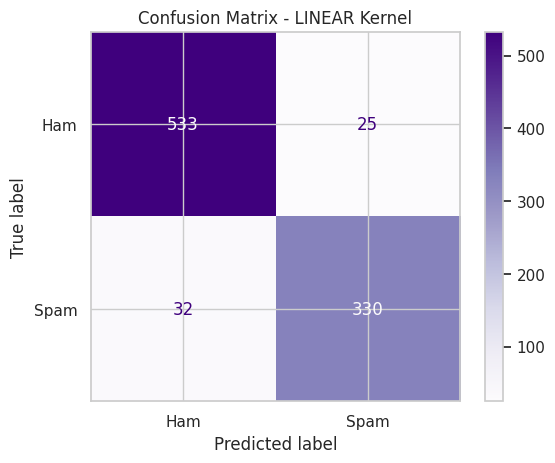

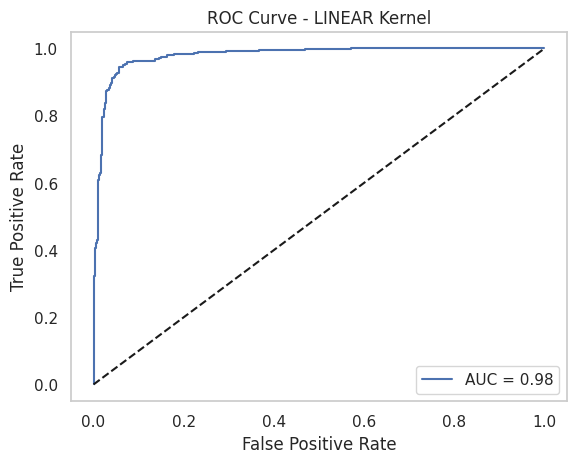


🔍 GridSearchCV for POLY kernel
✅ Best Params: {'C': 10, 'degree': 2, 'gamma': 'auto'}
✅ Best CV F1 Score: 0.8660208776786067


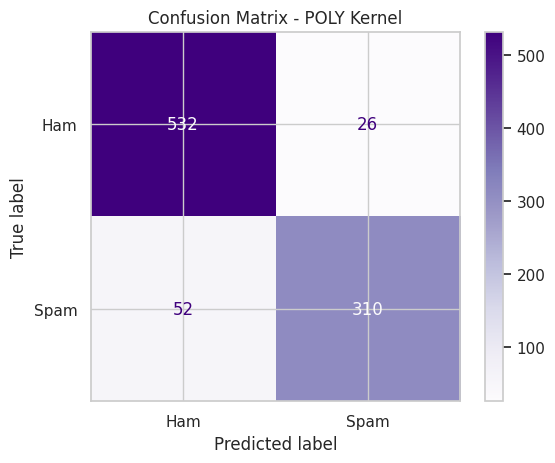

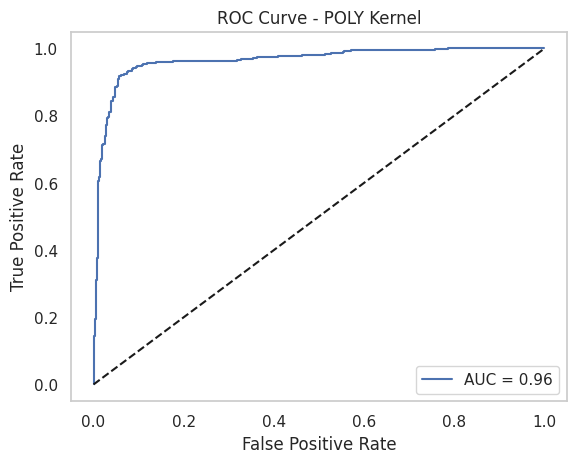


🔍 GridSearchCV for RBF kernel
✅ Best Params: {'C': 10, 'gamma': 'scale'}
✅ Best CV F1 Score: 0.9059295016653277


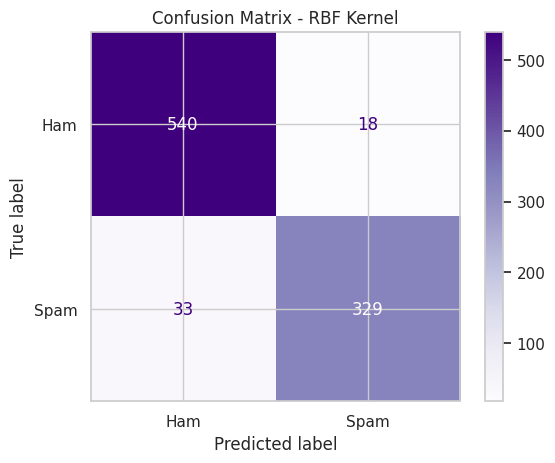

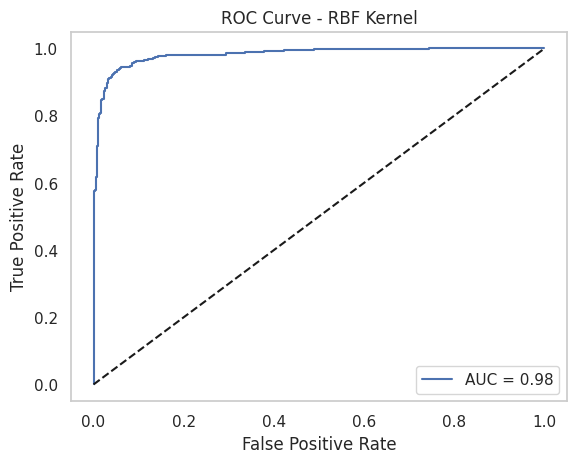


🔍 GridSearchCV for SIGMOID kernel
✅ Best Params: {'C': 1, 'gamma': 'scale'}
✅ Best CV F1 Score: 0.8436747025861739


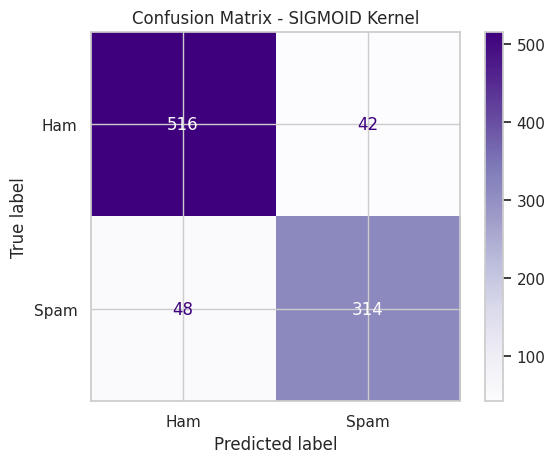

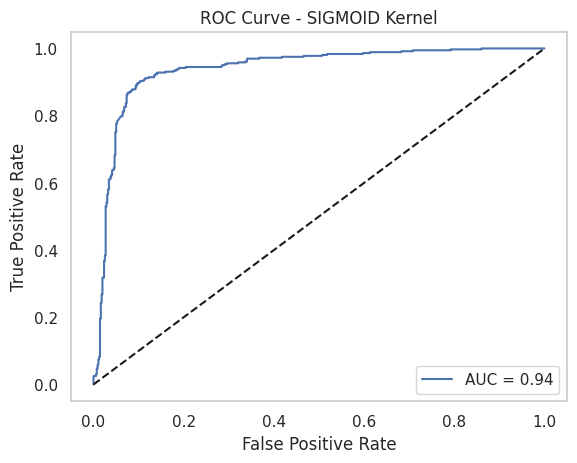

In [7]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for each kernel
param_grids = {
    'linear': {
        'C': [0.1, 1, 10]
    },
    'poly': {
        'C': [0.1, 1, 10],
        'degree': [2, 3, 4],
        'gamma': ['scale', 'auto']
    },
    'rbf': {
        'C': [0.1, 1, 10],
        'gamma': ['scale', 'auto']
    },
    'sigmoid': {
        'C': [0.1, 1, 10],
        'gamma': ['scale', 'auto']
    }
}

best_models = {}
results = []

for kernel in ['linear', 'poly', 'rbf', 'sigmoid']:
    print(f"\n🔍 GridSearchCV for {kernel.upper()} kernel")

    svc = SVC(kernel=kernel, probability=True)
    grid = GridSearchCV(svc, param_grids[kernel], cv=5, scoring='f1', n_jobs=-1)
    grid.fit(X_train, y_train)

    best_model = grid.best_estimator_
    best_models[kernel] = best_model

    print("✅ Best Params:", grid.best_params_)
    print("✅ Best CV F1 Score:", grid.best_score_)

    y_val_pred = best_model.predict(X_val)
    y_val_prob = best_model.predict_proba(X_val)[:, 1]

    acc = accuracy_score(y_val, y_val_pred)
    prec = precision_score(y_val, y_val_pred)
    rec = recall_score(y_val, y_val_pred)
    f1 = f1_score(y_val, y_val_pred)
    results.append((kernel.upper(), acc, prec, rec, f1))

    # Confusion matrix
    ConfusionMatrixDisplay.from_predictions(y_val, y_val_pred, display_labels=["Ham", "Spam"], cmap='Purples')
    plt.title(f"Confusion Matrix - {kernel.upper()} Kernel")
    plt.show()

    # ROC curve
    fpr, tpr, _ = roc_curve(y_val, y_val_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title(f"ROC Curve - {kernel.upper()} Kernel")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.grid()
    plt.show()


📈 Grid Search Results on Validation Set:


,Kernel,Accuracy,Precision,Recall,F1 Score
0,LINEAR,0.938043,0.929577,0.911602,0.920502
1,POLY,0.915217,0.922619,0.856354,0.888252
2,RBF,0.944565,0.948127,0.908840,0.928068
3,SIGMOID,0.902174,0.882022,0.867403,0.874652



🏆 Best Kernel Selected: RBF

🧪 Test Set Evaluation for RBF Kernel:
Accuracy: 0.9229
Precision: 0.9195
Recall: 0.8815
F1 Score: 0.9001


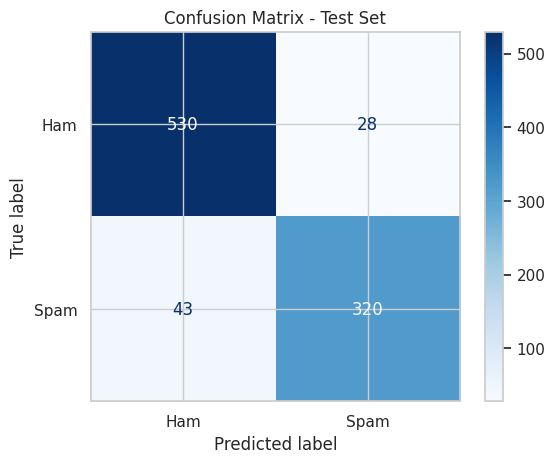

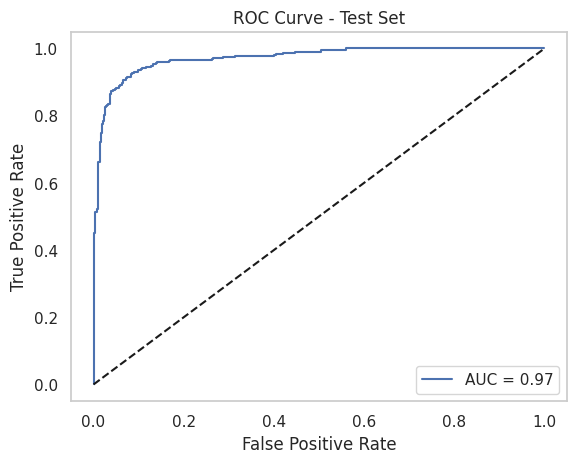

In [8]:
import pandas as pd

results_df = pd.DataFrame(results, columns=["Kernel", "Accuracy", "Precision", "Recall", "F1 Score"])
print("📈 Grid Search Results on Validation Set:")
display(results_df)

# Pick best model based on F1
best_kernel = results_df.sort_values(by='F1 Score', ascending=False).iloc[0]['Kernel'].lower()
print(f"\n🏆 Best Kernel Selected: {best_kernel.upper()}")

best_model = best_models[best_kernel]
best_model.fit(np.vstack([X_train, X_val]), np.concatenate([y_train, y_val]))

# Evaluate on test
y_test_pred = best_model.predict(X_test)
y_test_prob = best_model.predict_proba(X_test)[:, 1]

test_acc = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_prec = precision_score(y_test, y_test_pred)
test_rec = recall_score(y_test, y_test_pred)

print(f"\n🧪 Test Set Evaluation for {best_kernel.upper()} Kernel:")
print(f"Accuracy: {test_acc:.4f}")
print(f"Precision: {test_prec:.4f}")
print(f"Recall: {test_rec:.4f}")
print(f"F1 Score: {test_f1:.4f}")

# Confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred, display_labels=["Ham", "Spam"], cmap='Blues')
plt.title("Confusion Matrix - Test Set")
plt.show()

# ROC
fpr, tpr, _ = roc_curve(y_test, y_test_prob)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve - Test Set")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()
